# Sentiment Analysis of Bristish Airways Reviews

### Data Source:
link:https://www.airlinequality.com/airline-reviews/british-airways

### Import Libraries

In [40]:
# Web scraping
import pandas as pd
from bs4 import BeautifulSoup
import requests

# NLP tasks
import regex as re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
import nltk.collocations as collocations
from nltk import FreqDist, ngrams

# Data visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Web Scarping

In [3]:
# lists to store data
names = []
country = []
dates = []
headers = []
reviews = []
ratings = []
aircrafts = []
traveller_types = []
seat_type = []
routes = []
dates_flown = []
seat_comfort = []
cabin_service = []
food_beverages = []
inflight_entertainment = []
ground_service = []
value_for_money = []
recommendations = []

In [4]:
# loop through the pages and extract the data
for i in range(1, 10): # 10 pages of reviews
    
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html.parser") # parse the html content
    
    for item in soup.find_all("span", itemprop="name"):
      names.append(item.text)
    
    for item in soup.find_all("h3"):
      country.append(item.span.next_sibling.text.strip(" ()"))
    
    for item in soup.find_all("time"):
      dates.append(item.text)
    
    for item in soup.find_all("h2", class_="text_header"):
      headers.append(item.text)
    
    for item in soup.find_all("div", class_="text_content"):
      reviews.append(item.text)
    
    for item in soup.find_all("div", class_="rating-10"):
      try:
          ratings.append(item.span.text)
      except:
          print(f"Error on page {i}")
          ratings.append("None")
    
    for item in soup.find_all("td", class_="review-rating-header aircraft"):
      aircrafts.append(item.next_sibling.text if aircrafts else 'N/A')

    for item in soup.find_all("td", class_="review-rating-header type_of_traveller"):
      traveller_types.append(item.next_sibling.text if traveller_types else 'N/A')

    for item in soup.find_all("td", class_="review-rating-header cabin_flown"):
      seat_type.append(item.next_sibling.text)
    
    for item in soup.find_all("td", class_="review-rating-header route"):
      routes.append(item.next_sibling.text)

    for item in soup.find_all("td", class_="review-rating-header date_flown"):
      dates_flown.append(item.next_sibling.text if dates_flown else 'N/A')
    
    for item in soup.find_all("td", class_="review-rating-header seat_comfort"):
      sibling_td = item.find_next_sibling('td')
      if sibling_td:
        filled_stars = len(sibling_td.find_all('span', class_='star fill'))
        seat_comfort.append(filled_stars)
      else:
        seat_comfort.append('N/A')

    for item in soup.find_all("td", class_="review-rating-header cabin_staff_service"):
      sibling_td = item.find_next_sibling('td')
      if sibling_td:
        filled_stars = len(sibling_td.find_all('span', class_='star fill'))
        cabin_service.append(filled_stars)
      else:
        cabin_service.append('N/A')
    
    for item in soup.find_all("td", class_="review-rating-header food_and_beverages"):
      sibling_td = item.find_next_sibling('td')
      if sibling_td:
        filled_stars = len(sibling_td.find_all('span', class_='star fill'))
        food_beverages.append(filled_stars)
      else:
        food_beverages.append('N/A')
    
    for item in soup.find_all("td", class_="review-rating-header inflight_entertainment"):
      sibling_td = item.find_next_sibling('td')
      if sibling_td:
        filled_stars = len(sibling_td.find_all('span', class_='star fill'))
        inflight_entertainment.append(filled_stars)
      else:
        inflight_entertainment.append('N/A')
    
    for item in soup.find_all("td", class_="review-rating-header ground_service"):
      sibling_td = item.find_next_sibling('td')
      if sibling_td:
        filled_stars = len(sibling_td.find_all('span', class_='star fill'))
        ground_service.append(filled_stars)
      else:
        ground_service.append('N/A')

    for item in soup.find_all("td", class_="review-rating-header value_for_money"):
      sibling_td = item.find_next_sibling('td')
      if sibling_td:
        filled_stars = len(sibling_td.find_all('span', class_='star fill'))
        value_for_money.append(filled_stars)
    
    for item in soup.find_all("td", class_="review-rating-header recommended"):
      recommendations.append(item.next_sibling.text)
        

In [5]:
# check the length of the lists
list = [ names, country, dates, headers, reviews , ratings, aircrafts, 
        traveller_types, seat_type, routes, dates_flown, seat_comfort, 
        cabin_service, food_beverages, inflight_entertainment, ground_service, 
        value_for_money, recommendations]

for l in list:
    print(len(l))

900
900
900
900
900
909
463
898
900
896
900
817
807
700
463
846
900
900


In [6]:
# Fix the length of the lists
ratings = ratings[:900]

# List of all the lists to be padded with 'N/A'
lists_to_adjust = [aircrafts, traveller_types,routes, seat_comfort, cabin_service, food_beverages, inflight_entertainment, ground_service]

for lst in lists_to_adjust:
    diff = 900 - len(lst)
    lst.extend(['N/A'] * diff)

In [7]:
# Create a DataFrame
df = pd.DataFrame({
    'name': names,
    'country': country,
    'date_published': dates,
    'header': headers,
    'review': reviews,
    'rating': ratings,
    'aircraft': aircrafts,
    'traveller_type': traveller_types,
    'seat_type': seat_type,
    'route': routes,
    'date_flown': dates_flown,
    'seat_comfort': seat_comfort,
    'cabin_service': cabin_service,
    'food_beverages': food_beverages,
    'inflight_entertainment': inflight_entertainment,
    'ground_service': ground_service,
    'value_for_money': value_for_money,
    'recommendation': recommendations
    })    

df.head()

,name,country,date_published,header,review,rating,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_service,food_beverages,inflight_entertainment,ground_service,value_for_money,recommendation
0,Scott Fletcher,United Kingdom,17th December 2024,"""a national disgrace""",✅ Trip Verified | On a recent flight from Cy...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,N/A,N/A,Economy Class,Larnaca to Glasgow via Heathrow,N/A,1,1,1,2,1,1,no
1,William Cowie,Australia,17th December 2024,"""sheer neglect in keeping us informed""",✅ Trip Verified | Flight BA 0560 arrived in ...,1,Boeing 777,Couple Leisure,Economy Class,London to Rome,December 2024,2,4,1,5,1,2,no
2,Danilo Queiroz Palermo,United States,14th December 2024,"""a huge disappointment""",✅ Trip Verified | This was the first time I ...,1,Boeing 787,Business,Business Class,Washington to London,December 2024,4,3,5,5,1,1,no
3,J Meares,United Kingdom,13th December 2024,"""we had to bus to the aircraft""",✅ Trip Verified | Pretty good flight but sti...,2,A320,Solo Leisure,Business Class,Cape Town to London,December 2024,5,5,3,3,4,5,yes
4,P Gough,United Kingdom,12th December 2024,"“victims of their new supper service""","✅ Trip Verified | Check in was fine, but no pr...",8,A321,Solo Leisure,First Class,Mexico City to London Heathrow,November 2024,5,5,1,1,4,4,yes


## Data Cleaning

In [8]:
# Convert 'date_published' column to datetime objects
df['date_published'] = pd.to_datetime(df['date_published'], errors='coerce')

In [9]:
# header renaming it as review_summary 
df = df.rename(columns={"header": "review_summary"})

# Remove double quotes from the 'review_summary' column
df['review_summary'] = df['review_summary'].str.replace('"', '')
df['review_summary'] = df['review_summary'].str.replace('“', '')
df['review_summary'] = df['review_summary'].str.replace('”', '')

In [10]:
# creating a corpus by removing verified 
df['corpus'] = df['review'].apply(lambda x: re.sub(r'^.*\|', '', x))
df['corpus'] = df['corpus'].str.lstrip()
df['corpus'] = df['corpus'].str.replace('"', '')

In [11]:
# create a column verified_trips where the word comes before '|' in reviews
df['verified_trips'] = df['review'].str.split('|').str[0].str.strip()

df['verified_trips'] = df['verified_trips'].replace({'cNot Verified': 'Not Verified', '✅ Trip Verified': 'Trip Verified'})
df['verified_trips'].unique()

array(['Trip Verified', 'Not Verified'], dtype=object)

In [12]:
# remove \n\t\t\t\t\t\t\t\t\t\t\t\t from rating column
df['rating'] = df['rating'].astype(str).str.extract('(\d+)').astype(int)
df['rating'].unique()

array([ 5,  1,  2,  8,  7,  4, 10,  3,  6,  9])

In [13]:
df.head()

,name,country,date_published,review_summary,review,rating,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_service,food_beverages,inflight_entertainment,ground_service,value_for_money,recommendation,corpus,verified_trips
0,Scott Fletcher,United Kingdom,2024-12-17,a national disgrace,✅ Trip Verified | On a recent flight from Cy...,5,N/A,N/A,Economy Class,Larnaca to Glasgow via Heathrow,N/A,1,1,1,2,1,1,no,On a recent flight from Cyprus BA621 on 23/11/...,Trip Verified
1,William Cowie,Australia,2024-12-17,sheer neglect in keeping us informed,✅ Trip Verified | Flight BA 0560 arrived in ...,1,Boeing 777,Couple Leisure,Economy Class,London to Rome,December 2024,2,4,1,5,1,2,no,Flight BA 0560 arrived in Rome on 11 December ...,Trip Verified
2,Danilo Queiroz Palermo,United States,2024-12-14,a huge disappointment,✅ Trip Verified | This was the first time I ...,1,Boeing 787,Business,Business Class,Washington to London,December 2024,4,3,5,5,1,1,no,This was the first time I flew British Airways...,Trip Verified
3,J Meares,United Kingdom,2024-12-13,we had to bus to the aircraft,✅ Trip Verified | Pretty good flight but sti...,2,A320,Solo Leisure,Business Class,Cape Town to London,December 2024,5,5,3,3,4,5,yes,Pretty good flight but still some small things...,Trip Verified
4,P Gough,United Kingdom,2024-12-12,victims of their new supper service,"✅ Trip Verified | Check in was fine, but no pr...",8,A321,Solo Leisure,First Class,Mexico City to London Heathrow,November 2024,5,5,1,1,4,4,yes,"Check in was fine, but no priority/fast track ...",Trip Verified


In [17]:
df.to_csv('C:/Users/adnan/OneDrive/Desktop/Projects/British Airways/DATA/british_airways_reviews.csv', index=False)

In [18]:
ba_df = df.copy() # make a copy of the dataframe

## EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    900 non-null    object        
 1   country                 900 non-null    object        
 2   date_published          711 non-null    datetime64[ns]
 3   review_summary          900 non-null    object        
 4   review                  900 non-null    object        
 5   rating                  900 non-null    int64         
 6   aircraft                900 non-null    object        
 7   traveller_type          900 non-null    object        
 8   seat_type               900 non-null    object        
 9   route                   900 non-null    object        
 10  date_flown              900 non-null    object        
 11  seat_comfort            900 non-null    object        
 12  cabin_service           900 non-null    object    

In [20]:
# Convert the ratings columns to numeric
columns_to_convert = [
    'seat_comfort', 
    'cabin_service', 
    'food_beverages', 
    'inflight_entertainment', 
    'ground_service', 
    'value_for_money'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')


#### Overall Rating of Airline

<Axes: title={'center': 'Distribution of Ratings'}, xlabel='rating', ylabel='count'>

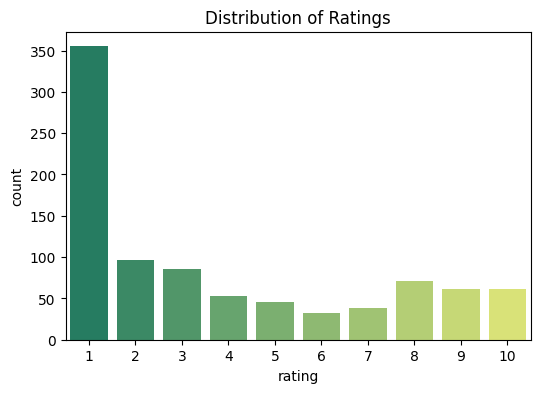

In [21]:
# plot the distribution of ratings
plt.figure(figsize=(6, 4))
plt.title('Distribution of Ratings')
sns.countplot(x='rating', data=df, palette='summer')

In [22]:
# overall rating 
avg_rating = df['rating'].mean()
print(f"The average rating of British Airways is: {round(avg_rating)}/10")

The average rating of British Airways is: 4/10


<Axes: title={'center': 'Max Reviews by Country'}, xlabel='country', ylabel='count'>

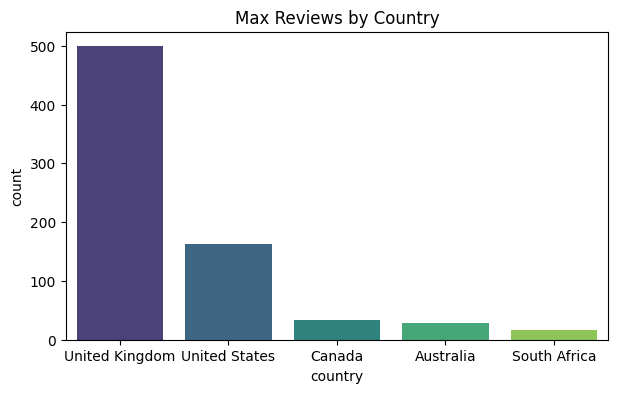

In [23]:
# Max Reviews by country
plt.figure(figsize=(7, 4))
plt.title('Max Reviews by Country')
top_countries = df['country'].value_counts().head()
sns.barplot(x=top_countries.index, y=top_countries, palette='viridis')


<Axes: title={'center': 'Average Rating by Country'}, xlabel='country', ylabel='rating'>

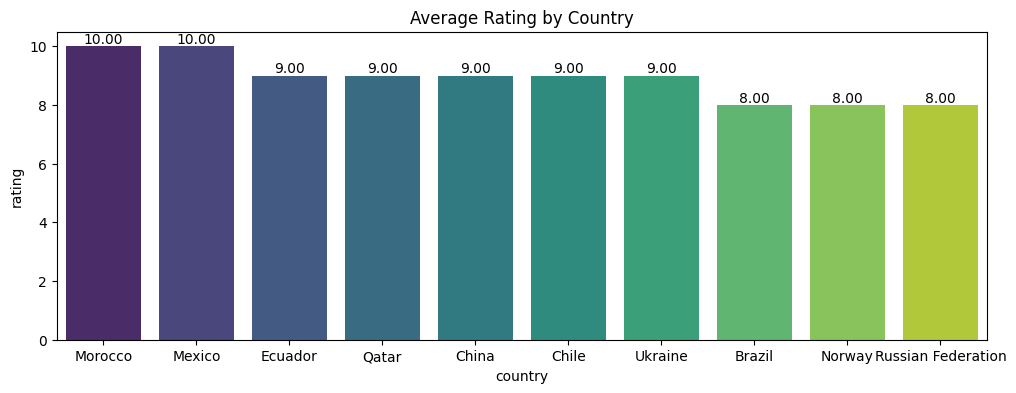

In [24]:
# Countries with the highest average rating
avg_rating_by_countries = df.groupby('country')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 4))

plt.title('Average Rating by Country')
for index, value in enumerate(avg_rating_by_countries):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
sns.barplot(x=avg_rating_by_countries.index, y=avg_rating_by_countries, palette='viridis')

<Axes: title={'center': 'Average Rating by Columns'}, xlabel='None', ylabel='None'>

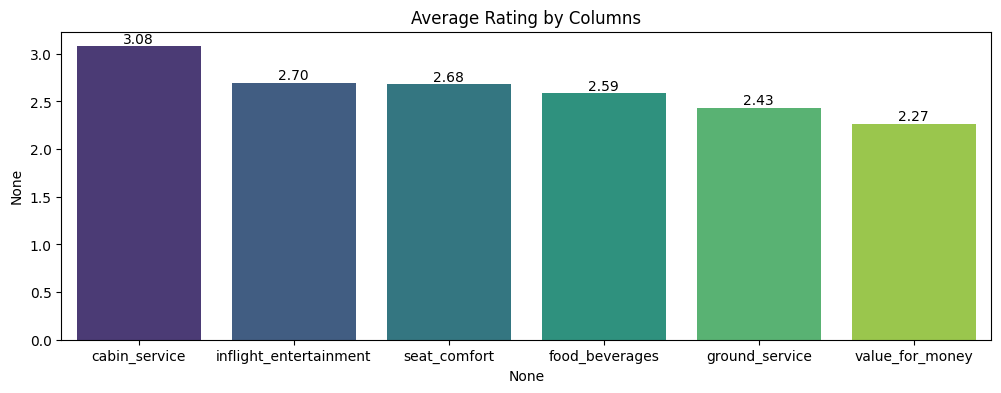

In [25]:
# plot a graph where which columns have highest average rating out of 5
rating_columns = ['seat_comfort', 'cabin_service', 'food_beverages', 'inflight_entertainment', 'ground_service', 'value_for_money']
avg_rating_by_columns = df[rating_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 4))
plt.title('Average Rating by Columns')
for index, value in enumerate(avg_rating_by_columns):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
sns.barplot(x=avg_rating_by_columns.index, y=avg_rating_by_columns, palette='viridis')


## Sentiment Analysis

#### Data Cleaning

##### Removing Punctuation 

In [26]:
# removing punctuations from the corpus
df['corpus'] = df['corpus'].str.replace('[^\w\s]','', regex=True)
print(df['corpus'])

0      On a recent flight from Cyprus BA621 on 231124...
1      Flight BA 0560 arrived in Rome on 11 December ...
2      This was the first time I flew British Airways...
3      Pretty good flight but still some small things...
4      Check in was fine but no priorityfast track li...
                             ...                        
895    London to Buenos Aires We paid extra on top of...
896    San Francisco to London A380 is a wonderful ae...
897    Sydney to Singapore with British Airways Packe...
898    London to Mauritius We are fortunate enough to...
899    Los Angeles to Amsterdam via London Due to del...
Name: corpus, Length: 900, dtype: object


##### Convert to lower case

In [27]:
#converting corpus to lowercase
df['corpus'] = df['corpus'].str.lower()
print(df['corpus'])

0      on a recent flight from cyprus ba621 on 231124...
1      flight ba 0560 arrived in rome on 11 december ...
2      this was the first time i flew british airways...
3      pretty good flight but still some small things...
4      check in was fine but no priorityfast track li...
                             ...                        
895    london to buenos aires we paid extra on top of...
896    san francisco to london a380 is a wonderful ae...
897    sydney to singapore with british airways packe...
898    london to mauritius we are fortunate enough to...
899    los angeles to amsterdam via london due to del...
Name: corpus, Length: 900, dtype: object


##### Tokenize the corpus

In [28]:
df['corpus'] = df.apply(lambda row: nltk.word_tokenize(row['corpus']), axis=1)
print(df['corpus'].iloc[0])

['on', 'a', 'recent', 'flight', 'from', 'cyprus', 'ba621', 'on', '231124', 'the', 'second', 'the', 'cabin', 'door', 'was', 'closed', 'the', 'pilot', 'announced', 'we', 'would', 'be', 'held', 'on', 'the', 'runway', 'for', '2', 'hours', 'they', 'know', 'this', 'prior', 'and', 'did', 'not', 'inform', 'passengers', 'until', 'after', 'we', 'had', 'boarded', 'the', 'flight', 'home', 'took', 'nearly', '6', 'hours', 'due', 'to', 'weather', 'conditions', 'this', 'plus', '2', 'hours', 'waiting', 'what', 'did', 'ba', 'offer', 'during', 'this', '8', 'hour', 'hell', 'flight', '3', 'oatmeal', 'biscuits', 'and', '250ml', 'of', 'water', 'for', 'our', 'family', 'when', 'i', 'went', 'to', 'the', 'cabin', 'crew', 'to', 'ask', 'for', 'more', 'water', 'which', 'i', 'was', 'told', 'there', 'wasnt', 'any', '3', 'out', 'of', 'the', '4', 'cabin', 'crew', 'were', 'asleep', 'in', 'the', 'back', 'row', 'seats', 'of', 'the', 'aircraft', 'ba621', 'on', '231124', 'this', 'infuriated', 'me', 'further', 'as', 'i', 'ha

##### Removing Stopwords

In [29]:
# remove stopwords
df['corpus'] = df['corpus'].apply(lambda x: ' '.join([word for word in x if word not in (stopwords)]))
print(df['corpus'].head(10))

0    recent flight cyprus ba621 231124 second cabin...
1    flight ba 0560 arrived rome 11 december passen...
2    first time flew british airways huge disappoin...
3    pretty good flight still small things improved...
4    check fine priorityfast track lines security b...
5    british airways absolute rubbish fly amsterdam...
6    flight time changed last minute without warnin...
7    im fraustrated flight cancelled last minute wa...
8    sat plane hour forty five minutes awaiting tak...
9    british airways stranding wife heathrow airpor...
Name: corpus, dtype: object


#### Sentiment Tags

##### Calculating Polarity to get Tags using VADER

In [30]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate VADER sentiment scores
def vader_sentiment(text):
    try:
        return sia.polarity_scores(text)
    except:
        return None

# Apply the VADER sentiment analysis to the corpus
df['vader_scores'] = df['corpus'].apply(vader_sentiment)

# Extract compound score and create a sentiment tag
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'] if x else None)
df['vader_tag'] = df['vader_compound'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Display the results
print(df[['corpus', 'vader_scores', 'vader_compound', 'vader_tag']].head(10))

                                              corpus  \
0  recent flight cyprus ba621 231124 second cabin...   
1  flight ba 0560 arrived rome 11 december passen...   
2  first time flew british airways huge disappoin...   
3  pretty good flight still small things improved...   
4  check fine priorityfast track lines security b...   
5  british airways absolute rubbish fly amsterdam...   
6  flight time changed last minute without warnin...   
7  im fraustrated flight cancelled last minute wa...   
8  sat plane hour forty five minutes awaiting tak...   
9  british airways stranding wife heathrow airpor...   

                                        vader_scores  vader_compound vader_tag  
0  {'neg': 0.112, 'neu': 0.814, 'pos': 0.074, 'co...         -0.8271  negative  
1  {'neg': 0.074, 'neu': 0.817, 'pos': 0.109, 'co...          0.6474  positive  
2  {'neg': 0.064, 'neu': 0.868, 'pos': 0.069, 'co...         -0.3415  negative  
3  {'neg': 0.043, 'neu': 0.655, 'pos': 0.302, 'co...       

In [31]:
dist = (df.groupby('vader_tag').size()/df['vader_tag'].count())*100
print(dist)

vader_tag
negative    46.222222
neutral      0.777778
positive    53.000000
dtype: float64


##### Visualizing the Sentiments

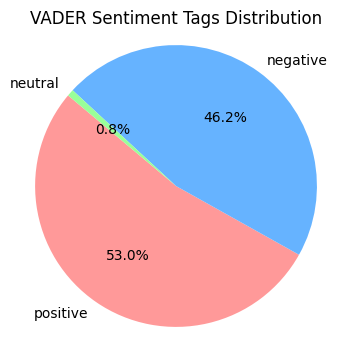

In [32]:
# Count the occurrences of each VADER tag
vader_tag_counts = df['vader_tag'].value_counts()

# Plot the pie chart for VADER tags
plt.figure(figsize=(4, 4))
plt.pie(vader_tag_counts, labels=vader_tag_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('VADER Sentiment Tags Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### Positive sentiment Word cloud

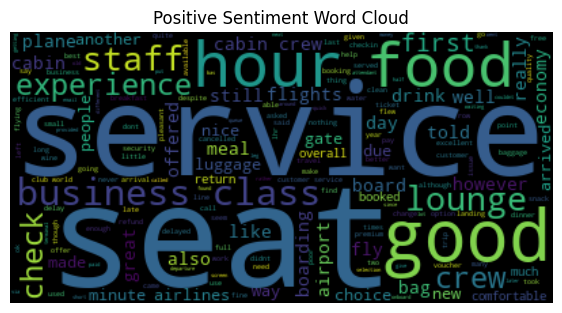

In [52]:
text_pos = ' '
for i in df.index:
    if df['vader_tag'][i] == 'positive':
        text_pos += df['corpus'][i] + ' '
# Add words to the stopwords list
additional_stopwords = {'ba', 'flight', 'airline', 'british', 'airways', 'airway', 'aircraft','would', 
                        'could', 'one', 'get', 'us', 'back', 'even', 'time', 'got', 'take',
                        'passenger', 'passengers', 'london', 'heathrow','anything'}
#stopwords.extend(additional_stopwords)

wordcloud_pos = WordCloud(stopwords=additional_stopwords).generate(text_pos)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

##### Negative sentiment Word cloud

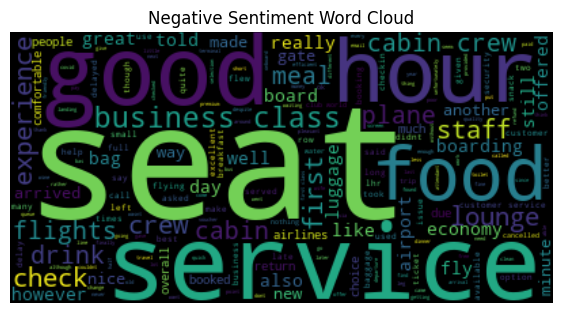

In [34]:
text_neg = ' '
for i in df.index:
    if df['vader_tag'][i] == 'negative':
        text_neg += df['corpus'][i] + ' '
# Add words to the stopwords list
stopwords.extend(additional_stopwords)

wordcloud_neg = WordCloud(stopwords=additional_stopwords).generate(text_neg)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

##### Word Frequency

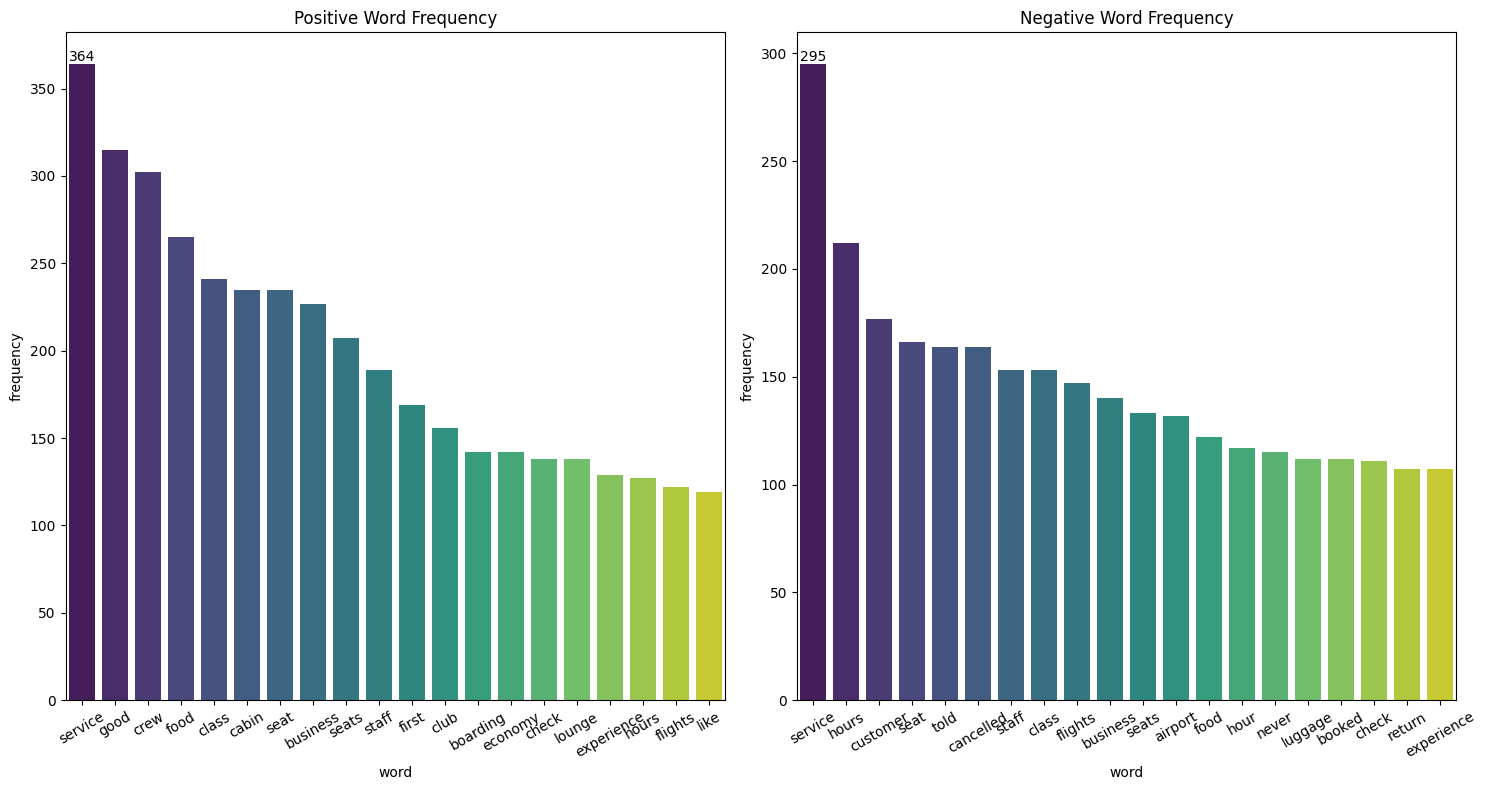

In [42]:
stopwords = additional_stopwords

# Filter the dataframe for positive and negative reviews
positive_reviews = df[df['vader_tag'] == 'positive']
negative_reviews = df[df['vader_tag'] == 'negative']

# Combine the text of all positive and negative reviews
text_pos = ' '.join(positive_reviews['corpus'])
text_neg = ' '.join(negative_reviews['corpus'])

# Split the text into words
words_pos = text_pos.split()
words_neg = text_neg.split()

# Remove stopwords
filtered_words_pos = [word for word in words_pos if word not in stopwords]
filtered_words_neg = [word for word in words_neg if word not in stopwords]

# Get the frequency distribution of words
fdist_pos = FreqDist(filtered_words_pos).most_common(20)
fdist_neg = FreqDist(filtered_words_neg).most_common(20)

# Create dataframes for plotting
df_fdist_pos = pd.DataFrame(fdist_pos, columns=['word', 'frequency'])
df_fdist_neg = pd.DataFrame(fdist_neg, columns=['word', 'frequency'])

# Plot positive word frequency
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.barplot(x='word', y='frequency', data=df_fdist_pos, ax=ax[0], palette='viridis')
ax[0].set_title('Positive Word Frequency')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)
ax[0].bar_label(ax[0].containers[0])

# Plot negative word frequency
sns.barplot(x='word', y='frequency', data=df_fdist_neg, ax=ax[1], palette='viridis')
ax[1].set_title('Negative Word Frequency')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)
ax[1].bar_label(ax[1].containers[0])

plt.tight_layout()
plt.show()

#### N-grams and Frequency

<Axes: >

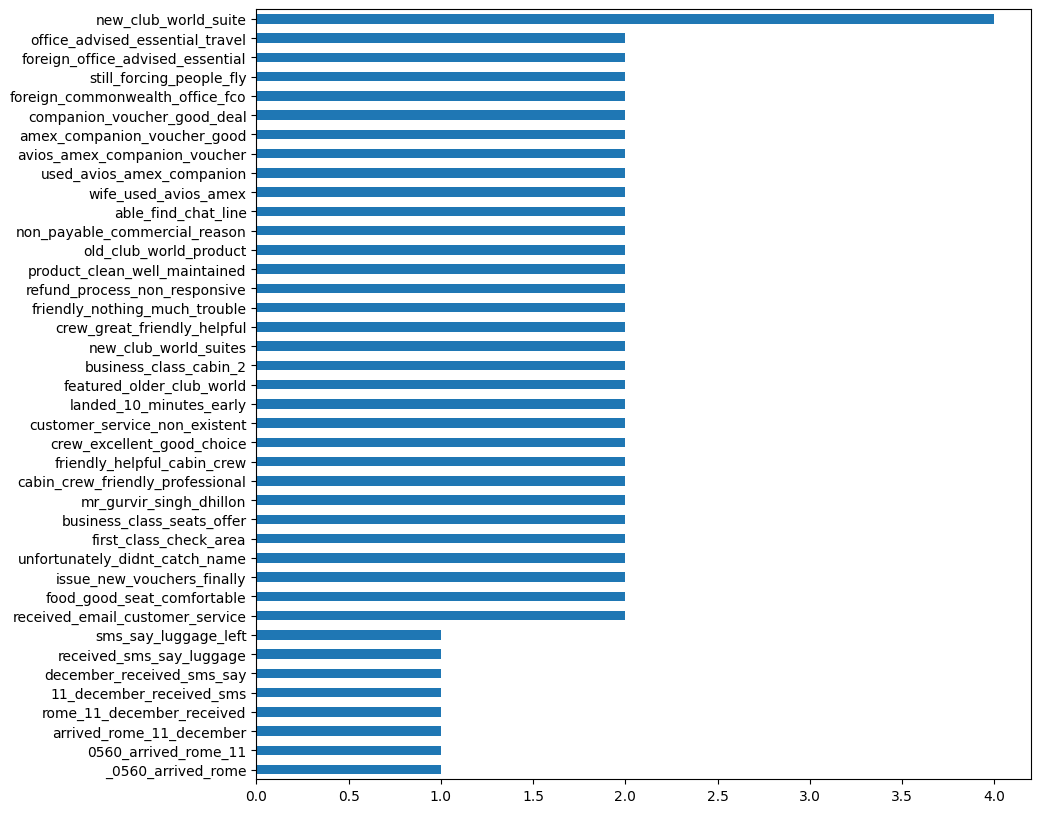

In [55]:
from nltk import ngrams
#split the text of all reviews into a list of words
words = text_pos.split(" ")

new_words = [word for word in words if word not in additional_stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    
    ## Generate n-grams
    ngrams_generated = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams_generated).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join n-gram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

get_freq_dist(new_words, 4)

<Axes: >

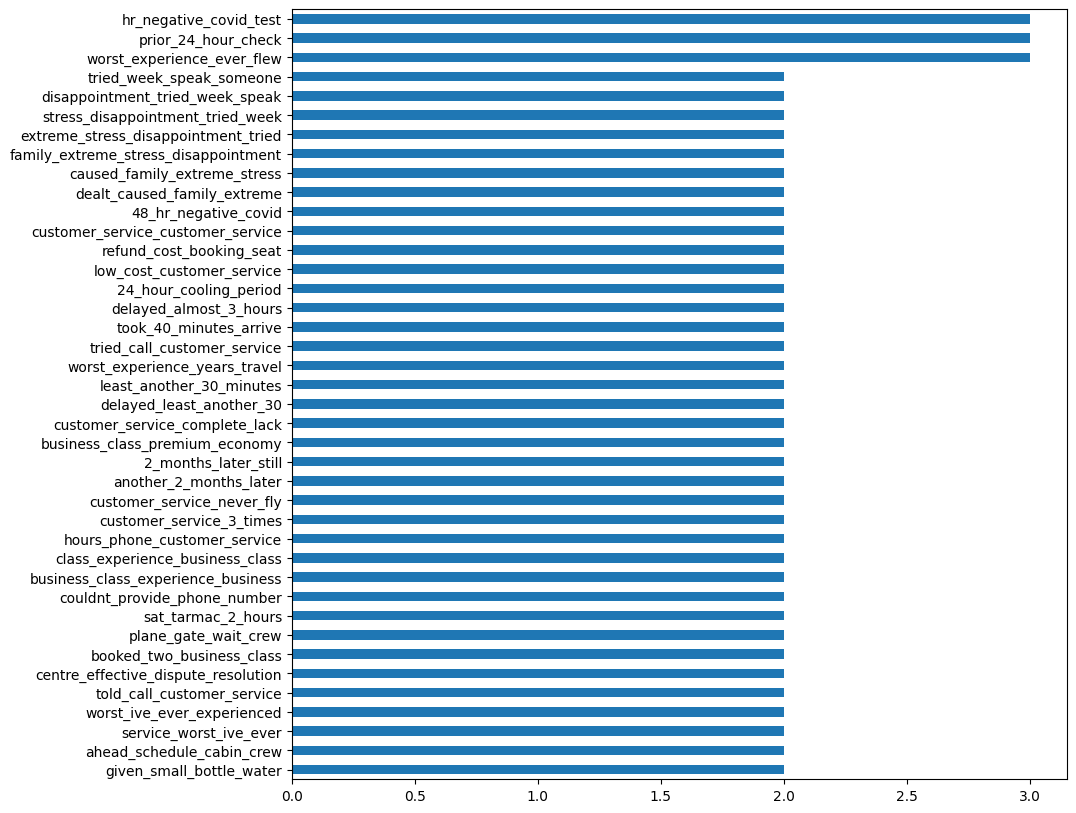

In [56]:
from nltk import ngrams
#split the text of all reviews into a list of words
words = text_neg.split(" ")

new_words = [word for word in words if word not in additional_stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    
    ## Generate n-grams
    ngrams_generated = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams_generated).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join n-gram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

get_freq_dist(new_words, 4)

##### Ratings based on Sentiments

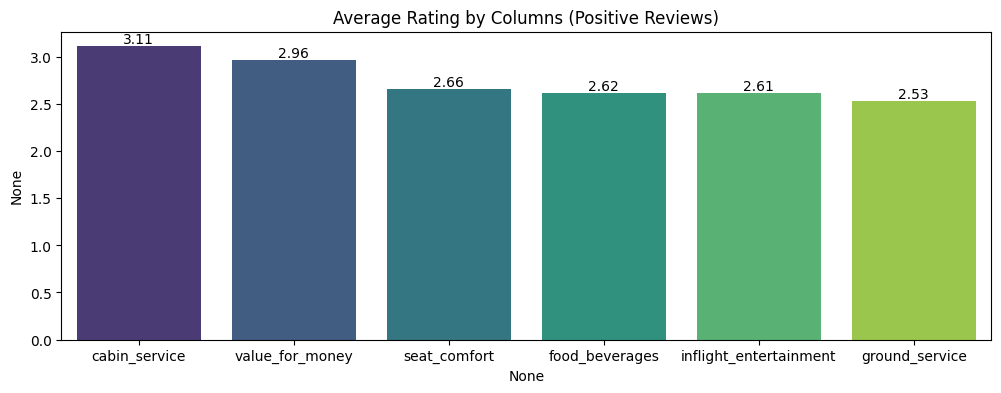

In [36]:
# plot a graph where which columns have highest average rating
rating_columns = ['seat_comfort', 'cabin_service', 'food_beverages', 'inflight_entertainment', 'ground_service', 'value_for_money']

# Filter the dataframe for positive reviews
positive_reviews = df[df['vader_tag'] == 'positive']

# Calculate the average rating for each column in positive reviews
avg_rating_by_columns_positive = positive_reviews[rating_columns].mean().sort_values(ascending=False)

# Plot the average rating for each column in positive reviews
plt.figure(figsize=(12, 4))
plt.title('Average Rating by Columns (Positive Reviews)')
for index, value in enumerate(avg_rating_by_columns_positive):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
sns.barplot(x=avg_rating_by_columns_positive.index, y=avg_rating_by_columns_positive, palette='viridis')
plt.show()

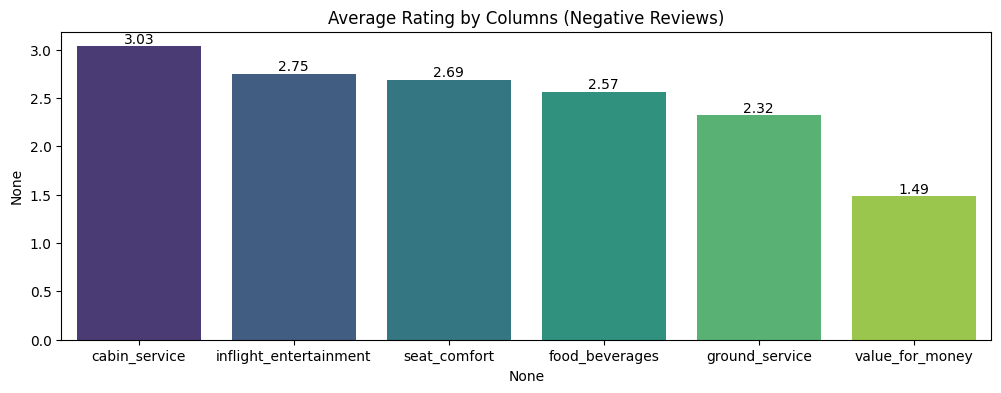

In [37]:
# plot a graph where which columns have highest average rating
rating_columns = ['seat_comfort', 'cabin_service', 'food_beverages', 'inflight_entertainment', 'ground_service', 'value_for_money']

# Filter the dataframe for positive reviews
positive_reviews = df[df['vader_tag'] == 'negative']

# Calculate the average rating for each column in positive reviews
avg_rating_by_columns_positive = positive_reviews[rating_columns].mean().sort_values(ascending=False)

# Plot the average rating for each column in positive reviews
plt.figure(figsize=(12, 4))
plt.title('Average Rating by Columns (Negative Reviews)')
for index, value in enumerate(avg_rating_by_columns_positive):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
sns.barplot(x=avg_rating_by_columns_positive.index, y=avg_rating_by_columns_positive, palette='viridis')
plt.show()